### Problem Statement:

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.
 

#### Importing Problem Statement

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

#Importing Visualising Libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes = True)

#Importing DataCleaning Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder


#Importing Predictive Models 
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from scipy.stats import uniform 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import RandomizedSearchCV

#Importing model evaluation metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score

#Importing Lasso and Ridge for Regularization
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

import joblib

In [2]:
#Loading train Dataset
train = pd.read_excel("Data_Train.xlsx")
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


### About Dataset :

- __FEATURES:__

    - `Airline`: The name of the airline.

    - `Date_of_Journey`: The date of the journey

    - `Source` : The source from which the service begins.

    - `Destination` : The destination where the service ends.

    - `Route` : The route taken by the flight to reach the destination.

    - `Dep_Time` : The time when the journey starts from the source.

    - `Arrival_Time` : Time of arrival at the destination.

    - `Duration`: Total duration of the flight.

    - `Total_Stops`: Total stops between the source and destination.

    - `Additional_Info`: Additional information about the flight


- __TARGET :__

    - `Price` : The price of the ticket

### Exploratory Data Analysis (EDA)

In [3]:
# Shape of Train dataset
print('Shape of our Train Dataset is Rows: {} Columns: {}'.format(train.shape[0], train.shape[1]))

Shape of our Train Dataset is Rows: 10683 Columns: 11


In [4]:
#Analsying the dtypes of the variables

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
#Checking for null values

train.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [6]:
#Dropping null values

train = train.dropna()

In [7]:
#Checking for duplicate fields/records

train.duplicated().sum()

220

In [8]:
# Displaying all the indexes of duplicate records
np.where(train.duplicated())

(array([  683,  1061,  1348,  1418,  1674,  1685,  1704,  1807,  1891,
         1971,  1982,  2093,  2548,  2595,  2661,  2677,  2716,  2845,
         2870,  2903,  2943,  3003,  3102,  3135,  3151,  3256,  3283,
         3363,  3450,  3457,  3620,  3632,  3674,  3711,  3717,  3843,
         3856,  3984,  4026,  4096,  4132,  4260,  4300,  4323,  4412,
         4571,  4593,  4636,  4649,  4710,  4865,  4920,  4945,  5014,
         5042,  5092,  5336,  5359,  5363,  5365,  5391,  5442,  5470,
         5483,  5509,  5844,  5855,  5913,  5928,  5967,  6052,  6126,
         6170,  6206,  6377,  6449,  6469,  6510,  6512,  6658,  6670,
         6742,  6758,  6770,  6881,  6884,  6898,  6972,  6986,  7088,
         7104,  7133,  7185,  7229,  7259,  7283,  7345,  7453,  7502,
         7589,  7611,  7647,  7666,  7676,  7743,  7754,  7794,  7907,
         7912,  7925,  8065,  8069,  8105,  8112,  8168,  8174,  8180,
         8181,  8216,  8310,  8319,  8344,  8360,  8383,  8446,  8496,
      

In [9]:
#Dropping duplicate fields/records

train = train.drop_duplicates()

In [10]:
# Rechecking for null values
train.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [11]:
# Rechecking for duplicate fields/records
train.duplicated().sum()

0

In [12]:
#Statistical Overview of our Numerical Features
train.describe()

,Price
count,10462.000000
mean,9026.790289
std,4624.849541
min,1759.000000
25%,5224.000000
50%,8266.000000
75%,12344.750000
max,79512.000000


## Data Cleaning

In [13]:
#Seperating Day - Month - Year columns using pandas Datetime function

train['Date_of_Journey'] = pd.to_datetime(train['Date_of_Journey'])
train['Month'] = train['Date_of_Journey'].apply(lambda x:x.month)
train['Day'] = train['Date_of_Journey'].apply(lambda x:x.day)
#train['Year'] = train['Date_of_Journey'].apply(lambda x:x.year)

In [14]:
#Seperating Day - Month - Year columns using pandas Datetime function

train['Dep_Time'] = pd.to_datetime(train['Dep_Time'])
train['Hour_of_Departure'] = train['Dep_Time'].apply(lambda x:x.hour)
train['Minute_of_Departure'] = train['Dep_Time'].apply(lambda x:x.minute)

In [15]:
#Seperating Day - Month - Year columns using pandas Datetime function

train['Arrival_Time'] = pd.to_datetime(train['Arrival_Time'])
train['Hour_of_Arrival'] = train['Arrival_Time'].apply(lambda x:x.hour)
train['Minute_of_Arrival'] = train['Arrival_Time'].apply(lambda x:x.minute)

In [16]:
#Seperating different stop from the complete Route

train['Stop1'] = train['Route'].str.split(' → ').str[0]
train['Stop2'] = train['Route'].str.split(' → ').str[1]
train['Stop3'] = train['Route'].str.split(' → ').str[2]
train['Stop4'] = train['Route'].str.split(' → ').str[3]
train['Stop5'] = train['Route'].str.split(' → ').str[4]

In [17]:
# Replacing Non-Stop with 0 stops

train['Total_Stops'] = train['Total_Stops'].replace('non-stop','0 stops')

In [18]:
#Filling Nans in all 5 stops

train['Stop1'].fillna("None",inplace = True)
train['Stop2'].fillna("None",inplace = True)
train['Stop3'].fillna("None",inplace = True)
train['Stop4'].fillna("None",inplace = True)
train['Stop5'].fillna("None",inplace = True)

In [19]:
#Seperating hour and minute of duration and Retreiving numeric value from duration 

train['Duration_Hour'] = train['Duration'].str.split('h').str[0]
train['Duration_Minute'] = train['Duration'].str.split('h').str[1]
train['Duration_Minute'] = train['Duration_Minute'].str.split('m').str[0]

In [20]:
# Replacing 5m with 5

train['Duration_Minute'] = train['Duration_Minute'].replace("5m","5")

In [21]:
#Removing empty spaces

train['Total_Stops'] = train['Total_Stops'].str.split(" ").str[0]

In [22]:
# Dropping columns which are used to derive other columns

train.drop(columns = ['Date_of_Journey','Route','Dep_Time','Arrival_Time','Duration'], axis = 1, inplace = True)

In [23]:
train.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Month,Day,Hour_of_Departure,Minute_of_Departure,Hour_of_Arrival,Minute_of_Arrival,Stop1,Stop2,Stop3,Stop4,Stop5,Duration_Hour,Duration_Minute
0,IndiGo,Banglore,New Delhi,0,No info,3897,3,24,22,20,1,10,BLR,DEL,None,None,None,2,50
1,Air India,Kolkata,Banglore,2,No info,7662,1,5,5,50,13,15,CCU,IXR,BBI,BLR,None,7,25
2,Jet Airways,Delhi,Cochin,2,No info,13882,9,6,9,25,4,25,DEL,LKO,BOM,COK,None,19,
3,IndiGo,Kolkata,Banglore,1,No info,6218,12,5,18,5,23,30,CCU,NAG,BLR,None,None,5,25
4,IndiGo,Banglore,New Delhi,1,No info,13302,1,3,16,50,21,35,BLR,NAG,DEL,None,None,4,45


In [24]:
#Checking for null values after cleaning dataset
train.isna().sum()

Airline                0
Source                 0
Destination            0
Total_Stops            0
Additional_Info        0
Price                  0
Month                  0
Day                    0
Hour_of_Departure      0
Minute_of_Departure    0
Hour_of_Arrival        0
Minute_of_Arrival      0
Stop1                  0
Stop2                  0
Stop3                  0
Stop4                  0
Stop5                  0
Duration_Hour          0
Duration_Minute        1
dtype: int64

In [25]:
#Dropping Null values
train.dropna(inplace = True)

### Univariate Analysis

Text(0.5, 1.0, 'Distribution of Categories of Airlines')

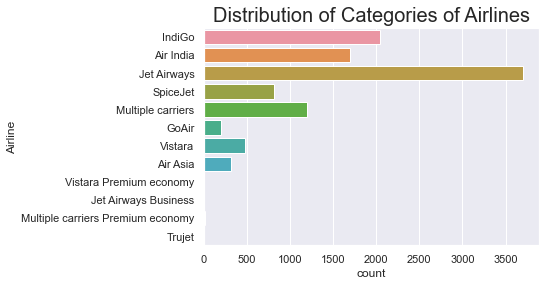

In [26]:
sns.countplot(data = train, y = 'Airline')
plt.title("Distribution of Categories of Airlines", fontsize = 20)

- Jet Airways have more Flights flying as compared to others.

Text(0.5, 1.0, 'Distribution of Categories of Source Take-off')

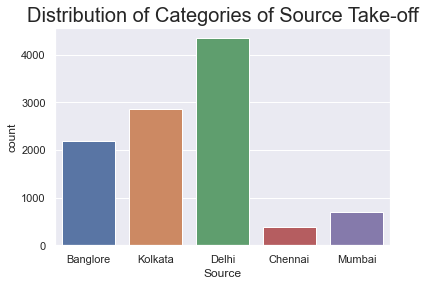

In [27]:
sns.countplot(train['Source'])
plt.title("Distribution of Categories of Source Take-off", fontsize = 20)

- Most Flights take - off from Delhi in our dataset.

Text(0.5, 1.0, 'Distribution of Categories of Destinations ')

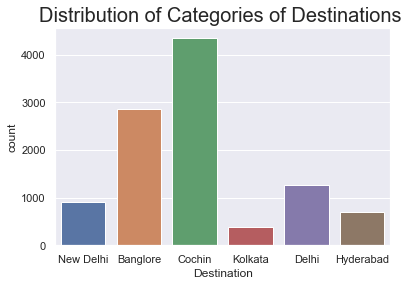

In [28]:
sns.countplot(train['Destination'])
plt.title("Distribution of Categories of Destinations ", fontsize = 20)

- Most Flights are flying to Cochin in our Dataset.

Text(0.5, 1.0, 'Distribution of Categories of Total-Stops')

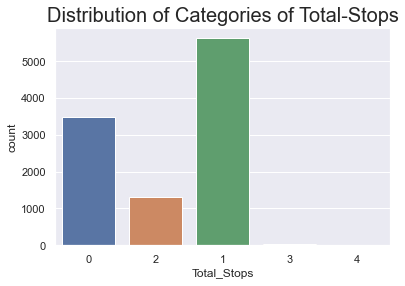

In [29]:
sns.countplot(train['Total_Stops'])
plt.title("Distribution of Categories of Total-Stops", fontsize = 20)

- There's mostly 1 stop between flights.

Text(0.5, 1.0, 'Distribution of Categories of Additional information of Flight')

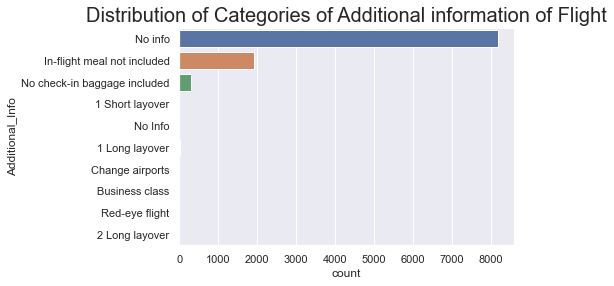

In [30]:
sns.countplot(data = train, y = 'Additional_Info')
plt.title("Distribution of Categories of Additional information of Flight", fontsize = 20)

- Majorly there's no additional information.

Text(0.5, 1.0, 'Distribution of Day of Flight')

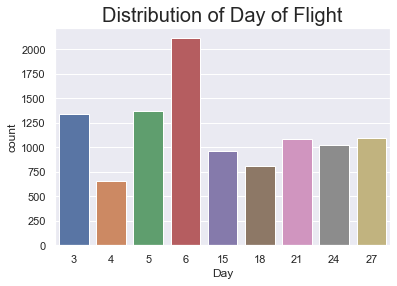

In [31]:
sns.countplot(data = train, x = 'Day')
plt.title("Distribution of Day of Flight", fontsize = 20)

- There are more number of flight on 6th of the month.

Text(0.5, 1.0, 'Distribution of Month of Flight')

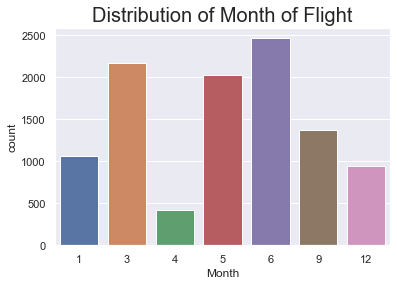

In [32]:
sns.countplot(data = train, x = 'Month')
plt.title("Distribution of Month of Flight", fontsize = 20)

- There are more number of flight in June and least number of flights in April.

Text(0.5, 1.0, 'Distribution of Hour of Arrival of Flight')

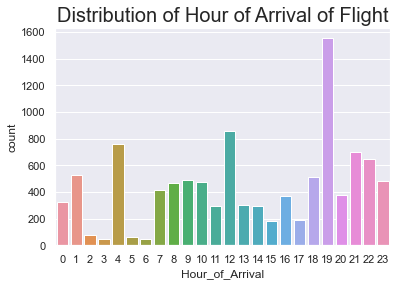

In [33]:
sns.countplot(data = train, x = 'Hour_of_Arrival')
plt.title("Distribution of Hour of Arrival of Flight", fontsize = 20)

- Most flights are reaching destination at 7pm.

Text(0.5, 1.0, 'Distribution of Minute of Arrival of Flight')

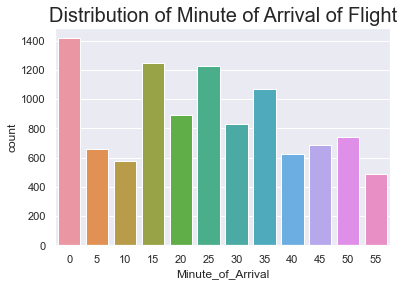

In [34]:
sns.countplot(data = train, x = 'Minute_of_Arrival')
plt.title("Distribution of Minute of Arrival of Flight", fontsize = 20)

- Most flights are reaching destination at 7pm.

Text(0.5, 1.0, 'Distribution of Minute of Departure of Flight')

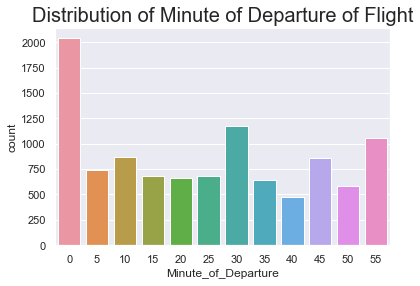

In [35]:
sns.countplot(data = train, x = 'Minute_of_Departure')
plt.title("Distribution of Minute of Departure of Flight", fontsize = 20)

- Most flights are taking - off at 9am.

Text(0.5, 1.0, 'Distribution of Hour of Departure of Flight')

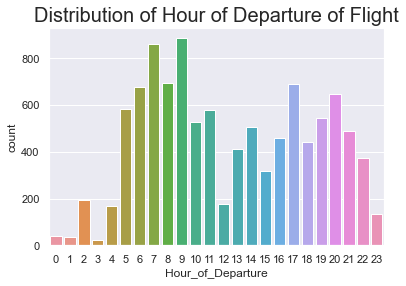

In [36]:
sns.countplot(data = train, x = 'Hour_of_Departure')
plt.title("Distribution of Hour of Departure of Flight", fontsize = 20)

- Most flights are taking - off at 9am.

### Bivariate Analysis

Text(0.5, 1.0, 'Airline Prices')

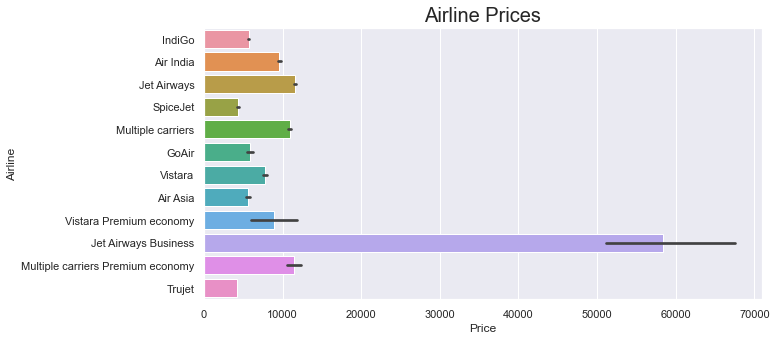

In [37]:
plt.figure(figsize = (10,5))
sns.barplot(data = train, x = 'Price', y = 'Airline')
plt.title("Airline Prices",fontsize = 20)

- Jet Airways Business class is most expensive among all other companies whereas Trujet is the most Bugdet Friendly.

Text(0.5, 1.0, 'Prices according to Source')

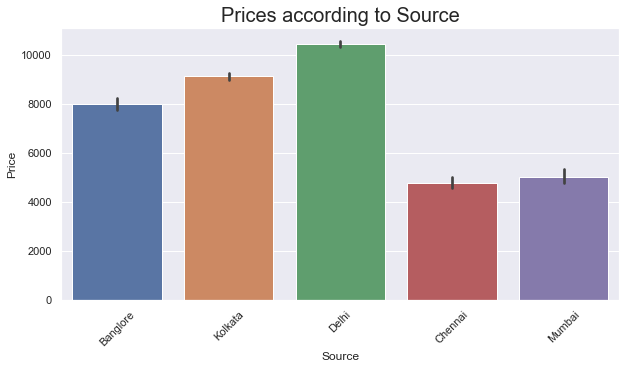

In [38]:
plt.figure(figsize = (10,5))
sns.barplot(data = train, y = 'Price', x = 'Source')
plt.xticks(rotation = 45)
plt.title("Prices according to Source",fontsize = 20)

- Flights boarding from Delhi are most expensive and from chennai is cheaper.

Text(0.5, 1.0, 'Prices according to Destination')

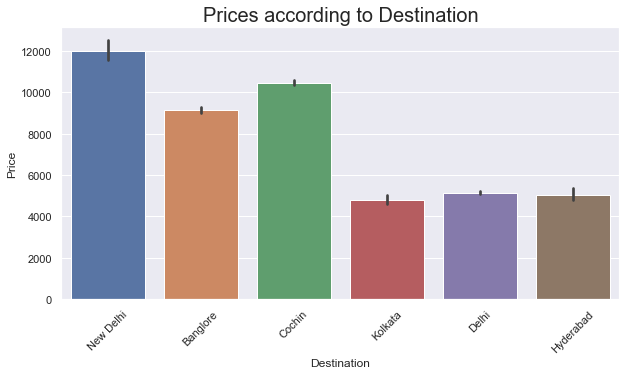

In [39]:
plt.figure(figsize = (10,5))
sns.barplot(data = train, y = 'Price', x = 'Destination')
plt.xticks(rotation = 45)
plt.title("Prices according to Destination",fontsize = 20)

- Flights going to New Delhi are most expensive.

Text(0.5, 1.0, 'Prices according to Total_Stops')

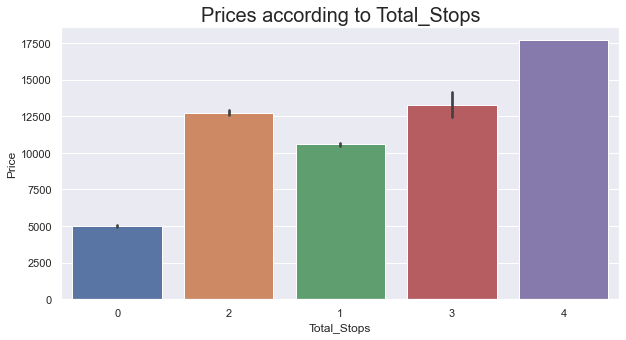

In [40]:
plt.figure(figsize = (10,5))
sns.barplot(data = train, y = 'Price', x = 'Total_Stops')
plt.title("Prices according to Total_Stops",fontsize = 20)

- Flights with 4 stops costs more.

Text(0.5, 1.0, 'Prices according to Additional Information')

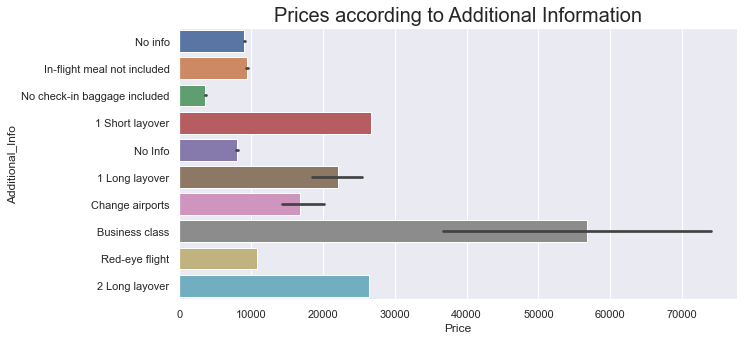

In [41]:
plt.figure(figsize = (10,5))
sns.barplot(data = train, y = 'Additional_Info', x = 'Price')
plt.title("Prices according to Additional Information",fontsize = 20)

- Flights which are business class are expensive.

Text(0.5, 1.0, 'Prices according to Month')

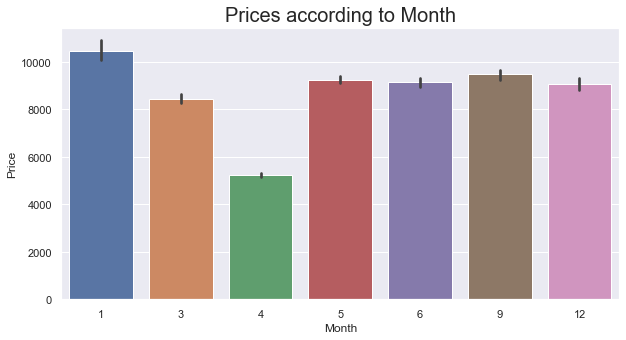

In [42]:
plt.figure(figsize = (10,5))
sns.barplot(data = train, y = 'Price', x = 'Month')
plt.title("Prices according to Month",fontsize = 20)

- Flight prices are highest in January and lowest in April.

Text(0.5, 1.0, 'Prices according to Day')

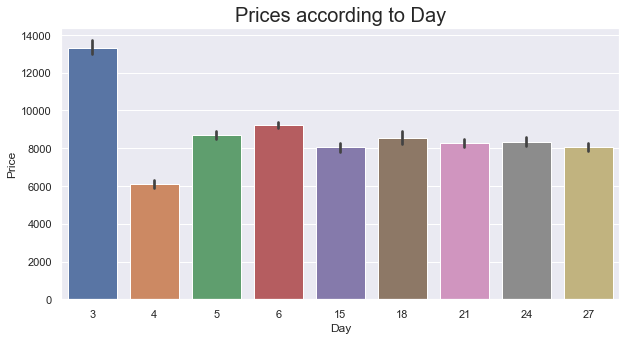

In [43]:
plt.figure(figsize = (10,5))
sns.barplot(data = train, y = 'Price', x = 'Day')
plt.title("Prices according to Day",fontsize = 20)

- Flight prices are highest in the beginning of the month as compared to other days.

Text(0.5, 1.0, 'Prices according to Duration_Hour')

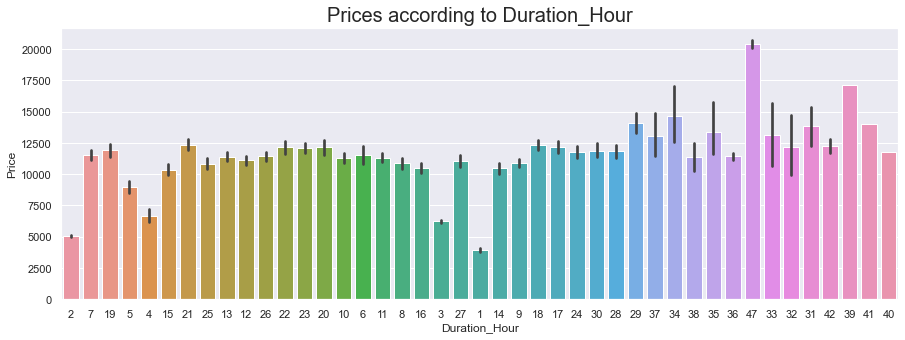

In [44]:
plt.figure(figsize = (15,5))
sns.barplot(data = train, y = 'Price', x = 'Duration_Hour')
plt.title("Prices according to Duration_Hour",fontsize = 20)

- Flight Prices increases as the Duration of the flight increases. Flight with 47 hours duration is the most expensive.

Text(0.5, 1.0, 'Prices according to Hour of Arrival')

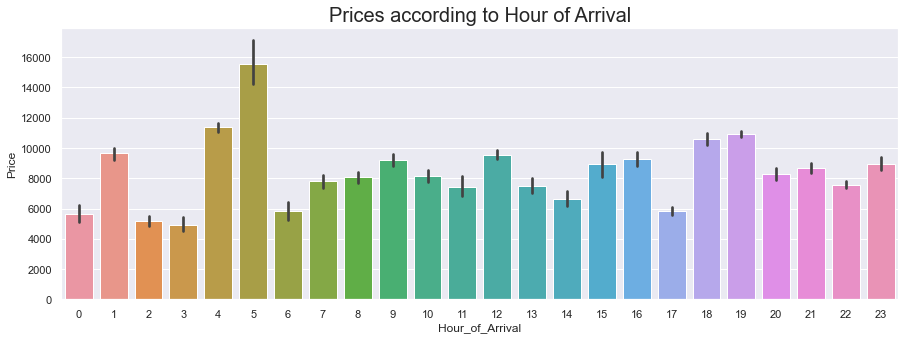

In [45]:
plt.figure(figsize = (15,5))
sns.barplot(data = train, y = 'Price', x = 'Hour_of_Arrival')
plt.title("Prices according to Hour of Arrival",fontsize = 20)

- Flight prices are high during early morning boarding.

Text(0.5, 1.0, 'Prices according to Hour of Departure')

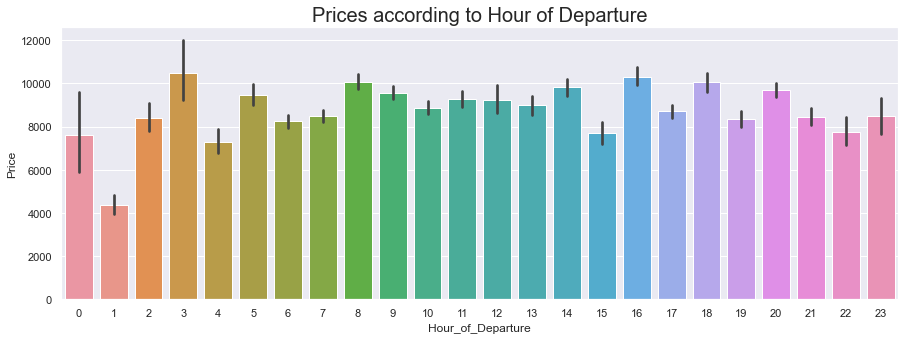

In [46]:
plt.figure(figsize = (15,5))
sns.barplot(data = train, y = 'Price', x = 'Hour_of_Departure')
plt.title("Prices according to Hour of Departure",fontsize = 20)

- Flight Prices are high during evening departure.

### Handling Skewness

In [47]:
#Checking skewness in our continuous feature

train['Price'].skew()

1.858221324955644

<AxesSubplot:xlabel='Price'>

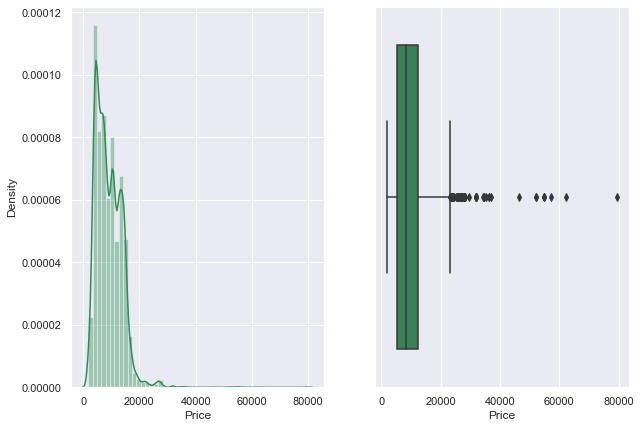

In [48]:
#Visualising outlier and skewness using boxplot and distribution plot

fig , ax = plt.subplots(1,2, figsize = (10,7))
sns.distplot(train['Price'],color ='seagreen',ax = ax[0])
sns.boxplot(train['Price'],color ='seagreen', ax = ax[1])

#we've rightly skewed data

In [49]:
#Removing skewness using square-root transformation

train['Price'] = np.sqrt(train['Price'])
train['Price'].skew()

0.4645998855153588

<AxesSubplot:xlabel='Price'>

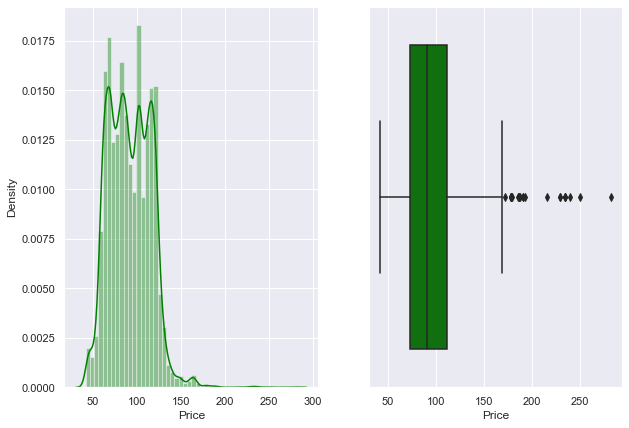

In [50]:
#Visualising outlier and skewness using boxplot and distribution plot after skewness removal

fig , ax = plt.subplots(1,2, figsize = (10,7))
sns.distplot(train['Price'],color ='green',ax = ax[0])
sns.boxplot(train['Price'],color ='green', ax = ax[1])


### Encoding Categorical Variables

In [51]:
from sklearn.preprocessing import LabelEncoder

In [52]:
enc = LabelEncoder()

In [53]:
train['Airline'] = enc.fit_transform(train['Airline'])
train['Source'] = enc.fit_transform(train['Source'])
train['Destination'] = enc.fit_transform(train['Destination'])
train['Additional_Info'] = enc.fit_transform(train['Additional_Info'])
train['Duration_Minute'] = enc.fit_transform(train['Duration_Minute'])
train['Stop1'] = enc.fit_transform(train['Stop1'])
train['Stop2'] = enc.fit_transform(train['Stop2'])
train['Stop3'] = enc.fit_transform(train['Stop3'])
train['Stop4'] = enc.fit_transform(train['Stop4'])
train['Stop5'] = enc.fit_transform(train['Stop5'])

In [54]:
train.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Month,Day,Hour_of_Departure,Minute_of_Departure,Hour_of_Arrival,Minute_of_Arrival,Stop1,Stop2,Stop3,Stop4,Stop5,Duration_Hour,Duration_Minute
0,3,0,5,0,8,62.425956,3,24,22,20,1,10,0,10,21,10,4,2,10
1,1,3,0,2,8,87.532851,1,5,5,50,13,15,2,20,1,3,4,7,4
2,4,2,1,2,8,117.821899,9,6,9,25,4,25,3,27,4,5,4,19,0
3,3,3,0,1,8,78.854296,12,5,18,5,23,30,2,29,3,10,4,5,4
4,3,0,5,1,8,115.334297,1,3,16,50,21,35,0,29,7,10,4,4,8


## Analysing Test Data

### Cleaning our Dataset

In [55]:
#loading test dataset
test = pd.read_excel("Test_set.xlsx")
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [56]:
# Shape of our Test dataset
print('Shape of test dataset is Rows: {} Columns: {}'.format(test.shape[0], test.shape[1]))

Shape of test dataset is Rows: 2671 Columns: 10


In [57]:
#Analsying the dtypes of the variables

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [58]:
# Checking for Null Values

test.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [59]:
# Checking for Duplicate records/fields

test.duplicated().sum()

26

In [60]:
#Dropping duplicate fields/records

test = test.drop_duplicates()

In [61]:
#Rechecking for Duplicate records/fields

test.duplicated().sum()

0

In [62]:
#Seperating Day - Month - Year columns using pandas Datetime function

test['Date_of_Journey'] = pd.to_datetime(test['Date_of_Journey'])
test['Month'] = test['Date_of_Journey'].apply(lambda x:x.month)
test['Day'] = test['Date_of_Journey'].apply(lambda x:x.day)
#train['Year'] = train['Date_of_Journey'].apply(lambda x:x.year)

In [63]:
#Seperating Day - Month - Year columns using pandas Datetime function

test['Dep_Time'] = pd.to_datetime(test['Dep_Time'])
test['Hour_of_Departure'] = test['Dep_Time'].apply(lambda x:x.hour)
test['Minute_of_Departure'] = test['Dep_Time'].apply(lambda x:x.minute)

In [64]:
#Seperating Day - Month - Year columns using pandas Datetime function

test['Arrival_Time'] = pd.to_datetime(test['Arrival_Time'])
test['Hour_of_Arrival'] = test['Arrival_Time'].apply(lambda x:x.hour)
test['Minute_of_Arrival'] = test['Arrival_Time'].apply(lambda x:x.minute)

In [65]:
#Seperating different stop from the complete Route

test['Stop1'] = test['Route'].str.split(' → ').str[0]
test['Stop2'] = test['Route'].str.split(' → ').str[1]
test['Stop3'] = test['Route'].str.split(' → ').str[2]
test['Stop4'] = test['Route'].str.split(' → ').str[3]
test['Stop5'] = test['Route'].str.split(' → ').str[4]

In [66]:
# Replacing Non-Stop with 0 stops

test['Total_Stops'] = test['Total_Stops'].replace('non-stop','0 stops')

In [67]:
#Filling Nans in all 5 stops

test['Stop1'].fillna("None",inplace = True)
test['Stop2'].fillna("None",inplace = True)
test['Stop3'].fillna("None",inplace = True)
test['Stop4'].fillna("None",inplace = True)
test['Stop5'].fillna("None",inplace = True)

In [68]:
#Seperating hour and minute of duration and Retreiving numeric value from duration 

test['Duration_Hour'] = test['Duration'].str.split('h').str[0]
test['Duration_Minute'] = test['Duration'].str.split('h').str[1]
test['Duration_Minute'] = test['Duration_Minute'].str.split('m').str[0]

In [69]:
# Replacing 5m with 5

test['Duration_Minute'] = test['Duration_Minute'].replace("5m","5")

In [70]:
#Removing empty spaces

test['Total_Stops'] = test['Total_Stops'].str.split(" ").str[0]

In [71]:
# Dropping columns which are used to derive other columns

test.drop(columns = ['Date_of_Journey','Route','Dep_Time','Arrival_Time','Duration'], axis = 1, inplace = True)

In [72]:
# Checking for Null Values

test.isna().sum()

Airline                0
Source                 0
Destination            0
Total_Stops            0
Additional_Info        0
Month                  0
Day                    0
Hour_of_Departure      0
Minute_of_Departure    0
Hour_of_Arrival        0
Minute_of_Arrival      0
Stop1                  0
Stop2                  0
Stop3                  0
Stop4                  0
Stop5                  0
Duration_Hour          0
Duration_Minute        1
dtype: int64

In [73]:
#Dropping Null Values
test.dropna(inplace = True)

In [74]:
# Rechecking for Null Values

test.isna().sum()

Airline                0
Source                 0
Destination            0
Total_Stops            0
Additional_Info        0
Month                  0
Day                    0
Hour_of_Departure      0
Minute_of_Departure    0
Hour_of_Arrival        0
Minute_of_Arrival      0
Stop1                  0
Stop2                  0
Stop3                  0
Stop4                  0
Stop5                  0
Duration_Hour          0
Duration_Minute        0
dtype: int64

### Encoding Test Dataset

In [75]:
test['Airline'] = enc.fit_transform(test['Airline'])
test['Source'] = enc.fit_transform(test['Source'])
test['Destination'] = enc.fit_transform(test['Destination'])
test['Additional_Info'] = enc.fit_transform(test['Additional_Info'])
test['Duration_Minute'] = enc.fit_transform(test['Duration_Minute'])
test['Stop1'] = enc.fit_transform(test['Stop1'])
test['Stop2'] = enc.fit_transform(test['Stop2'])
test['Stop3'] = enc.fit_transform(test['Stop3'])
test['Stop4'] = enc.fit_transform(test['Stop4'])
test['Stop5'] = enc.fit_transform(test['Stop5'])

In [76]:
test.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Month,Day,Hour_of_Departure,Minute_of_Departure,Hour_of_Arrival,Minute_of_Arrival,Stop1,Stop2,Stop3,Stop4,Stop5,Duration_Hour,Duration_Minute
0,4,2,1,1,5,6,6,17,30,4,25,3,6,5,6,3,10,11
1,3,3,0,1,5,12,5,6,20,10,20,2,24,3,6,3,4,0
2,4,2,1,1,3,5,21,19,15,19,0,3,6,5,6,3,23,8
3,6,2,1,1,5,5,21,8,0,21,0,3,6,5,6,3,13,0
4,0,0,2,0,5,6,24,23,55,2,45,0,10,18,6,3,2,10


## Model Building

In [77]:
#Splitting Dataset into Features and Target Variable

X = train.drop('Price',axis =1)
y = train['Price']

In [78]:
#Using Train_test_Split for splitting training and testing data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20)

### Linear Regression 

In [79]:
#Model Instantiating and Fitting

lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [80]:
#Printing model confidence on training set and testing set
print("Linear Regression Model Confidence on training set : ",round(lm.score(X_train,y_train)*100,2),'%')
print("Linear Regression Model Confidence on testing set : ",round(lm.score(X_test,y_test)*100,2),'%')

Linear Regression Model Confidence on training set :  56.43 %
Linear Regression Model Confidence on testing set :  59.72 %


In [81]:
#Performing Model Predictions on X_test
y_pred = lm.predict(X_test)

In [82]:
#printing Intercept and weights our Linear Regression Model
print("Intercept for Linear Regression Model is : ",lm.intercept_,'\n')
weights = zip(X.columns,lm.coef_)
weights = pd.DataFrame(list(weights), columns = ['features', 'coefficients'])
print("Features and their corresponding weights:")
weights

Intercept for Linear Regression Model is :  65.32324279425072 

Features and their corresponding weights:


,features,coefficients
0,Airline,0.588226
1,Source,-1.637600
2,Destination,1.325688
3,Total_Stops,19.694728
4,Additional_Info,0.901155
5,Month,-0.342987
6,Day,-0.354210
7,Hour_of_Departure,0.103258
8,Minute_of_Departure,-0.026825
9,Hour_of_Arrival,-0.030325


In [83]:
#Applying Evaluation metrics to our Regression model
print('R squared for our Linear Regression Model:', r2_score(y_test,y_pred))
print('Mean Absolute Error for our Linear Regression Model:',mean_absolute_error(y_test,y_pred))
print('Mean Squared Error for our Linear Regression Model:',mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error for our Linear Regression Model:',np.sqrt(mean_squared_error(y_test,y_pred)))

R squared for our Linear Regression Model: 0.5971620880729307
Mean Absolute Error for our Linear Regression Model: 11.571896863396027
Mean Squared Error for our Linear Regression Model: 208.4226780807317
Root Mean Squared Error for our Linear Regression Model: 14.436851390823822


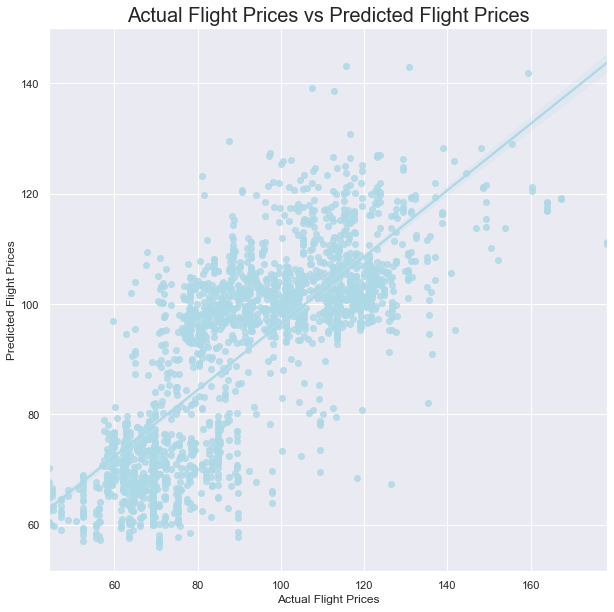

In [84]:
plt.figure(figsize = (10,10))
sns.regplot(x=y_test,y=y_pred,data=X, color = 'lightblue')
plt.xlabel('Actual Flight Prices')
plt.ylabel('Predicted Flight Prices')
plt.title('Actual Flight Prices vs Predicted Flight Prices',fontsize = 20)
plt.show()

### Regularization with Lasso

In [85]:
#LassoCV(lasso cross validation) will return the best alpha after max iterations
#normalizing is subtracting the mean and dividing by l2-norm
lasscv = LassoCV(alphas=None, max_iter=2000, normalize = True)
lasscv.fit(X_train,y_train)
alpha = lasscv.alpha_
alpha

0.00016803679175153436

In [86]:
#Now that we have best parameter, let's use lasso regression and see how well our data has fitted before
alpha = lasscv.alpha_

lasso_reg = Lasso(alpha)
lasso_reg.fit(X_train,y_train)

Lasso(alpha=0.00016803679175153436)

In [87]:
#Model Confidence After using Lasso Regression
print('Model Confidence After using Lasso Regularization Model: ',round(lasso_reg.score(X_test,y_test),3)*100, '%')

Model Confidence After using Lasso Regularization Model:  59.699999999999996 %


### Decision Tree Regressor

In [88]:
#Model instantiating and fitting

dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [89]:
#Applying Evaluation metrics to our Regression model
prd = dt.predict(X_test)

print('R squared for our Decision Tree Regression Model:', r2_score(y_test,prd))
print('Mean Absolute Error for our  Decision Tree Regression Model:',mean_absolute_error(y_test,prd))
print('Mean Squared Error for our  Decision Tree Regression Model:',mean_squared_error(y_test,prd))
print('Root Mean Squared Error for our  Decision Tree Regression Model:',np.sqrt(mean_squared_error(y_test,prd)))

R squared for our Decision Tree Regression Model: 0.8564010302437085
Mean Absolute Error for our  Decision Tree Regression Model: 3.6003399723902
Mean Squared Error for our  Decision Tree Regression Model: 74.29609021421679
Root Mean Squared Error for our  Decision Tree Regression Model: 8.619517980387116


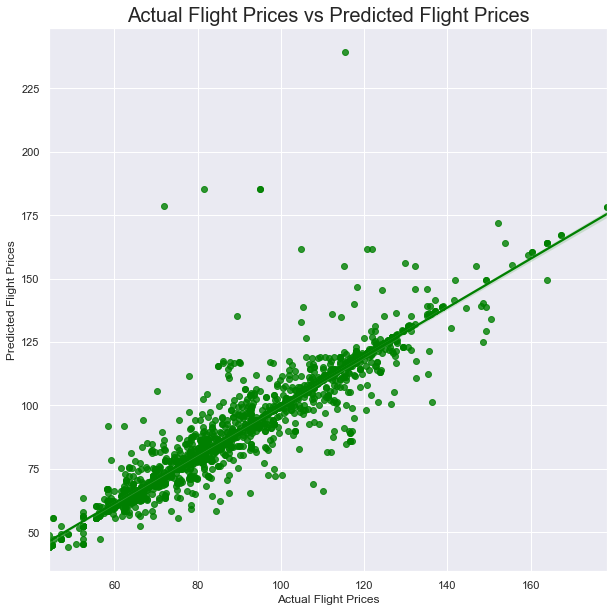

In [90]:
plt.figure(figsize = (10,10))
sns.regplot(x=y_test,y=prd,data=X, color = 'green')
plt.xlabel('Actual Flight Prices')
plt.ylabel('Predicted Flight Prices')
plt.title('Actual Flight Prices vs Predicted Flight Prices',fontsize = 20)
plt.show()

### Random Forest Regressor

In [91]:
# Model Instantiating and fitting
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
pred = rf.predict(X_test)
r2_score(y_test,pred)

0.9361436760728679

In [92]:
#Applying Evaluation metrics to our Regression model
print('R squared for our Random Forest Regressor Model:', r2_score(y_test,pred))
print('Mean Absolute Error for our Random Forest Regressor Model:',mean_absolute_error(y_test,pred))
print('Mean Squared Error for our Random Forest Regressor Model:',mean_squared_error(y_test,pred))
print('Root Mean Squared Error for our Random Forest Regressor Model:',np.sqrt(mean_squared_error(y_test,pred)))

R squared for our Random Forest Regressor Model: 0.9361436760728679
Mean Absolute Error for our Random Forest Regressor Model: 3.166629511934516
Mean Squared Error for our Random Forest Regressor Model: 33.038365186673644
Root Mean Squared Error for our Random Forest Regressor Model: 5.74790093744435


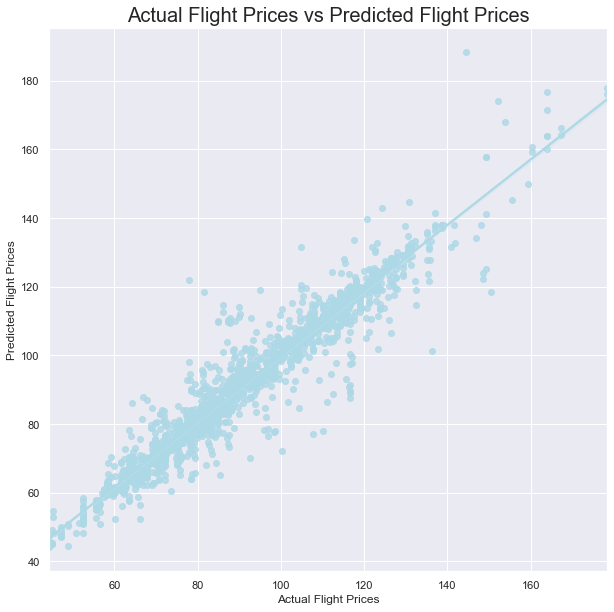

In [93]:
plt.figure(figsize = (10,10))
sns.regplot(x=y_test,y=pred,data=X, color = 'lightblue')
plt.xlabel('Actual Flight Prices')
plt.ylabel('Predicted Flight Prices')
plt.title('Actual Flight Prices vs Predicted Flight Prices',fontsize = 20)
plt.show()

### K Nearest Neighbor Regressor

In [94]:
#Model fitting and Instantiating

knn = KNeighborsRegressor()
knn.fit(X_train,y_train)

KNeighborsRegressor()

In [95]:
print("Model Confidence on training Dataset: ",knn.score(X_train,y_train)*100,'%')
print("Model Confidence on test Dataset:",knn.score(X_test,y_test)*100,'%')

Model Confidence on training Dataset:  82.08507444070287 %
Model Confidence on test Dataset: 76.40788686994831 %


In [96]:
knnpred  = knn.predict(X_test)
#Applying Evaluation metrics to our KNN Regression model
print('R2 Score for KNN Regression Model:', r2_score(y_test,knnpred))
print('Mean Absolute Error for our KNN Regression Model:',mean_absolute_error(y_test,knnpred))
print('Mean Squared Error for our KNN Regression Model:',mean_squared_error(y_test,knnpred))
print('Root Mean Squared Error for our KNN Regression Model:',np.sqrt(mean_squared_error(y_test,knnpred)))

R2 Score for KNN Regression Model: 0.7640788686994832
Mean Absolute Error for our KNN Regression Model: 7.737432438736178
Mean Squared Error for our KNN Regression Model: 122.06228000305924
Root Mean Squared Error for our KNN Regression Model: 11.048179940744053


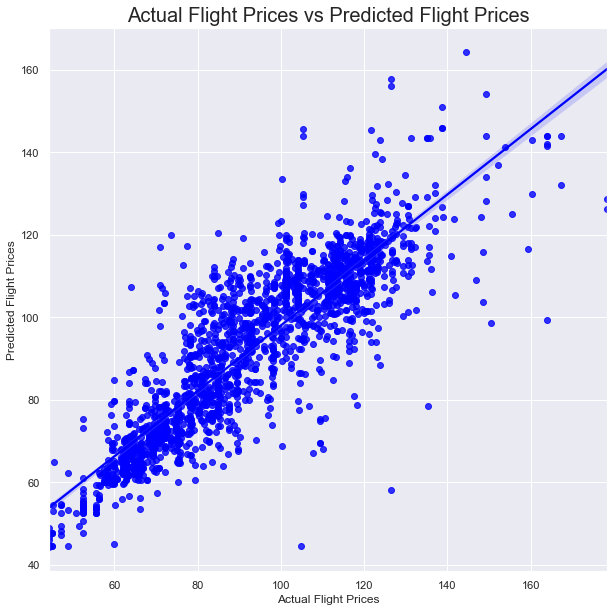

In [97]:
plt.figure(figsize = (10,10))
sns.regplot(x=y_test,y=knnpred,data=X, color = 'blue')
plt.xlabel('Actual Flight Prices')
plt.ylabel('Predicted Flight Prices')
plt.title('Actual Flight Prices vs Predicted Flight Prices',fontsize = 20)
plt.show()

### Gradient Boosting Regressor

In [98]:
#Model Instantiating and fitting

gradient = GradientBoostingRegressor()
gradient.fit(X_train,y_train)

GradientBoostingRegressor()

In [99]:
grpred = gradient.predict(X_test)
#Applying Evaluation metrics to our Gradient Boostin Regresser model
print('R2 Score for Gradient Boostin Regresser Model:', r2_score(y_test,grpred))
print('Mean Absolute Error for our Gradient Boostin Regresser Model:',mean_absolute_error(y_test,grpred))
print('Mean Squared Error for our Gradient Boostin Regresser Model:',mean_squared_error(y_test,grpred))
print('Root Mean Squared Error for our Gradient Boostin Regresser Model:',np.sqrt(mean_squared_error(y_test,grpred)))

R2 Score for Gradient Boostin Regresser Model: 0.8706403625941069
Mean Absolute Error for our Gradient Boostin Regresser Model: 6.167361064109927
Mean Squared Error for our Gradient Boostin Regresser Model: 66.92885963665155
Root Mean Squared Error for our Gradient Boostin Regresser Model: 8.181006028395991


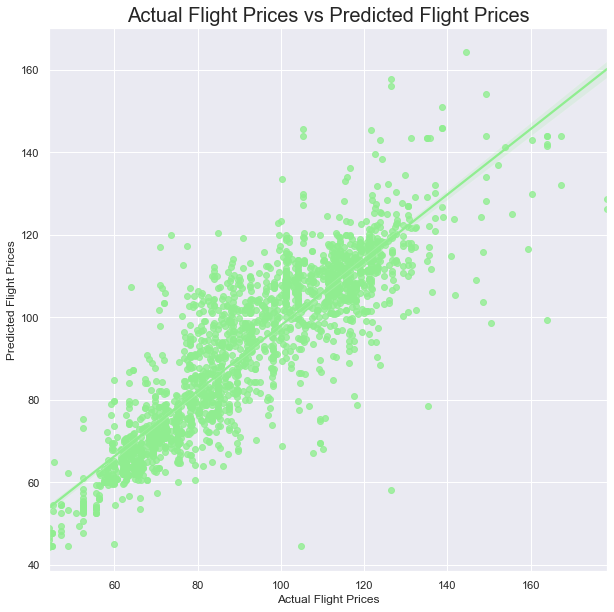

In [100]:
plt.figure(figsize = (10,10))
sns.regplot(x=y_test,y=knnpred,data=X, color = 'lightgreen')
plt.xlabel('Actual Flight Prices')
plt.ylabel('Predicted Flight Prices')
plt.title('Actual Flight Prices vs Predicted Flight Prices',fontsize = 20)
plt.show()

### Bagging Regressor

In [101]:
#Model Instantiating and fitting

bagging = BaggingRegressor()
bagging.fit(X_train,y_train)

BaggingRegressor()

In [102]:
bgpred = bagging.predict(X_test)
#Applying Evaluation metrics to our Gradient Boostin Regresser model
print('R2 Score for Gradient Boostin Regresser Model:', r2_score(y_test,bgpred))
print('Mean Absolute Error for our Gradient Boostin Regresser Model:',mean_absolute_error(y_test,bgpred))
print('Mean Squared Error for our Gradient Boostin Regresser Model:',mean_squared_error(y_test,bgpred))
print('Root Mean Squared Error for our Gradient Boostin Regresser Model:',np.sqrt(mean_squared_error(y_test,bgpred)))

R2 Score for Gradient Boostin Regresser Model: 0.9292258086364045
Mean Absolute Error for our Gradient Boostin Regresser Model: 3.33168858441898
Mean Squared Error for our Gradient Boostin Regresser Model: 36.61757264214325
Root Mean Squared Error for our Gradient Boostin Regresser Model: 6.051245544691048


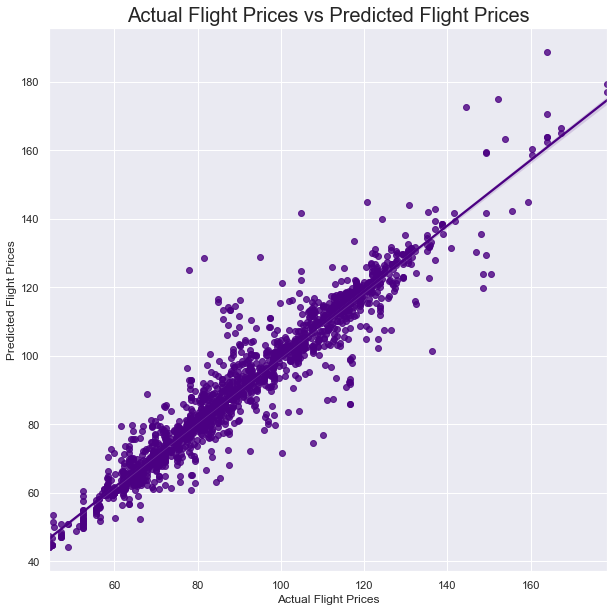

In [103]:
plt.figure(figsize = (10,10))
sns.regplot(x=y_test,y=bgpred,data=X, color = 'indigo')
plt.xlabel('Actual Flight Prices')
plt.ylabel('Predicted Flight Prices')
plt.title('Actual Flight Prices vs Predicted Flight Prices',fontsize = 20)
plt.show()

### Adaboost Regressor

In [104]:
#Model Instantiating and fitting

ada = AdaBoostRegressor()
ada.fit(X_train,y_train)

AdaBoostRegressor()

In [105]:
adapred = ada.predict(X_test)
#Applying Evaluation metrics to our Gradient Boostin Regresser model
print('R2 Score for Gradient Boostin Regresser Model:', r2_score(y_test,adapred))
print('Mean Absolute Error for our Gradient Boostin Regresser Model:',mean_absolute_error(y_test,adapred))
print('Mean Squared Error for our Gradient Boostin Regresser Model:',mean_squared_error(y_test,adapred))
print('Root Mean Squared Error for our Gradient Boostin Regresser Model:',np.sqrt(mean_squared_error(y_test,adapred)))

R2 Score for Gradient Boostin Regresser Model: 0.5446094698794557
Mean Absolute Error for our Gradient Boostin Regresser Model: 12.753762030642832
Mean Squared Error for our Gradient Boostin Regresser Model: 235.6126646727117
Root Mean Squared Error for our Gradient Boostin Regresser Model: 15.349679627689683


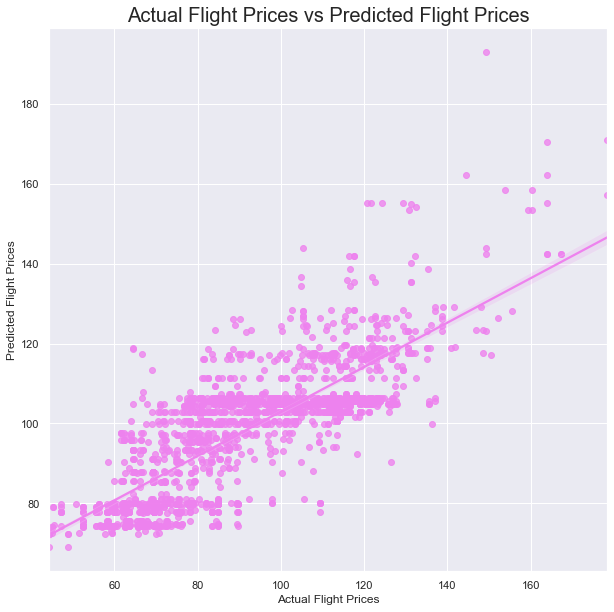

In [106]:
plt.figure(figsize = (10,10))
sns.regplot(x=y_test,y=adapred,data=X, color = 'violet')
plt.xlabel('Actual Flight Prices')
plt.ylabel('Predicted Flight Prices')
plt.title('Actual Flight Prices vs Predicted Flight Prices',fontsize = 20)
plt.show()

### Conclusion :
- Among all other models Random Forest Regressor Model seems to giving us high scores among all evaluation metrics : 
    - R_square Score: 0.925
    - MAE : 3.286
    - MSE : 37.429
    - RMSE : 6.117

### Hyperparameter Tuning of Our Best Model

In [107]:
param_grid = { 'min_samples_leaf' : [2,3,4],'min_samples_split' : [2,3,4,5],'bootstrap': [True], 'max_depth': [5, 10, None], 'max_features': ['auto', 'log2'], 'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}

In [108]:
#Instantiating Randomized SearchCV
randomcv = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, n_iter = 50, cv = 3, verbose=2, random_state=42)

In [109]:
#Fitting our Random Search CV
randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=5; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=5; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=5; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=5; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=5; total time=   0.1s
[CV] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=9; total time=   0.1s
[

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=50,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': [5, 10, None],
                                        'max_features': ['auto', 'log2'],
                                        'min_samples_leaf': [2, 3, 4],
                                        'min_samples_split': [2, 3, 4, 5],
                                        'n_estimators': [5, 6, 7, 8, 9, 10, 11,
                                                         12, 13, 15]},
                   random_state=42, verbose=2)

In [110]:
#To check the best parameters to increase model Accuracy
randomcv.best_params_

{'n_estimators': 8,
 'min_samples_split': 3,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': None,
 'bootstrap': True}

In [111]:
#Instantiating Our Final Model
Model = RandomForestRegressor(n_estimators = 8 ,max_features = 'auto', min_samples_split = 3,min_samples_leaf = 2, max_depth = None,bootstrap = True)

In [112]:
#Fitting our final Model
Model.fit(X_train,y_train)

RandomForestRegressor(min_samples_leaf=2, min_samples_split=3, n_estimators=8)

In [113]:
#Applying Evaluation metrics to our Tuned Random Forest Regression model
y_pred = Model.predict(X_test)

print('R2 Score for Tuned Ridge Regression Model:', r2_score(y_test,y_pred))
print('Mean Absolute Error for our Tuned Ridge Regression Model:',mean_absolute_error(y_test,y_pred))
print('Mean Squared Error for our Tuned Ridge Regression Model:',mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error for our Ridge Linear Regression Model:',np.sqrt(mean_squared_error(y_test,y_pred)))

R2 Score for Tuned Ridge Regression Model: 0.9312464272967585
Mean Absolute Error for our Tuned Ridge Regression Model: 3.4866969663463054
Mean Squared Error for our Tuned Ridge Regression Model: 35.57213292531953
Root Mean Squared Error for our Ridge Linear Regression Model: 5.964237832725949


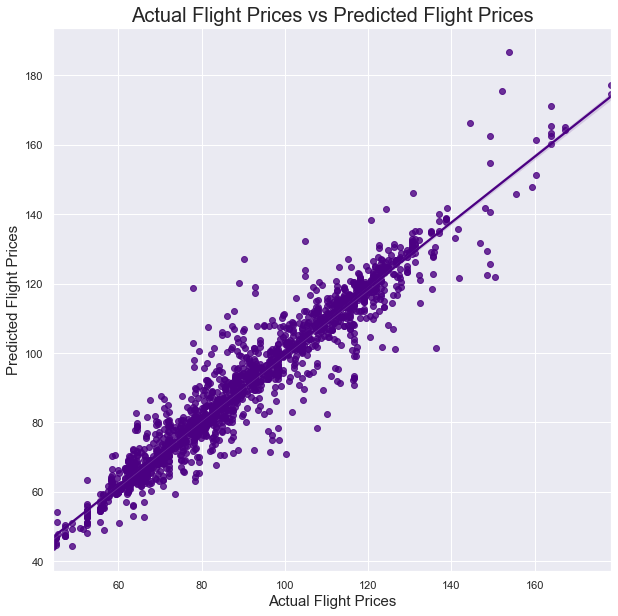

In [114]:
#Plotting Regression Line
plt.figure(figsize = (10,10))
sns.regplot(x=y_test,y=y_pred,data=X, color = 'indigo')
plt.xlabel('Actual Flight Prices', fontsize = 15)
plt.ylabel('Predicted Flight Prices',  fontsize = 15)
plt.title('Actual Flight Prices vs Predicted Flight Prices',fontsize = 20)
plt.show()

### Saving Our Final Model

In [115]:
joblib.dump(Model,"FlightPricePredictionAnalysis.pkl")

['FlightPricePredictionAnalysis.pkl']

### Loadin Our Final Model

In [116]:
Model = joblib.load("FlightPricePredictionAnalysis.pkl")

In [117]:
#predicting test data using loaded model and saving the results in a dataframe
prediction = Model.predict(test)
prediction = pd.DataFrame(prediction)

In [118]:
#Creating a dataset of Actual vs Predicted Datapoints
Flight_Prices = pd.DataFrame({})
Flight_Prices['Actual_Flight_Prices'] = y[:2000]
Flight_Prices['Predicted_Flight_Prices'] = prediction
Flight_Prices

,Actual_Flight_Prices,Predicted_Flight_Prices
0,62.425956,104.392356
1,87.532851,71.031654
2,117.821899,113.097119
3,78.854296,101.622359
4,115.334297,63.009163
...,...,...
2006,89.033701,56.049430
2007,66.955209,61.975802
2008,138.654246,98.369569
2009,68.498175,63.976994


In [119]:
#Converting the saved file into .csv format
Flight_Prices.to_csv('Results.csv',index = True)